  <h1 id="working-with-time-series-in-pandas">Working With Time Series in Pandas</h1>
<p>In this lesson, we will talk about how to work with time series data with pandas
dataframes.</p>
<h2 id="converting-to-datetime-type">Converting to DateTime Type</h2>
<p>Thus far we have discuessed numeric and string datatypes in pandas dataframes,
but pandas has a special type for dates as well.</p>
<p>To convert an existing string value or values to a datetime type, we can use the
<code>to_datetime</code> function from the pandas module.</p>

In [1]:
import pandas as pd

pd.to_datetime('Jan 1 1970')

Timestamp('1970-01-01 00:00:00')

<p>By default pandas will try to infer the date format, but there may be be cases
where pandas can't figure out the format itself, and we'd have to help out.</p>
<

In [2]:
try:
    pd.to_datetime('Jan:1:1970')
except ValueError as e:
    print('ValueError', e)

ValueError Unknown string format: Jan:1:1970


<p>Here we can specify a <strong>format string</strong> to tell pandas explicitly how to convert
this date.</p>

In [3]:
pd.to_datetime('Jan:1:1970', format='%b:%d:%Y')


Timestamp('1970-01-01 00:00:00')

<p>In addition to clarifying date format ambiguity, adding the <code>format=</code> keyword argument can significantly speed up the processing of larger datasets with non-standard formats.</p>
<p>In addition to single strings, <code>pd.to_datetime</code> will work with entire columns at a time.</p>


In [4]:
url = "https://gist.githubusercontent.com/ryanorsinger/b309f8db19e0ca71b213d4877d835e77/raw/f5841017310e2f4ca070b313529ceec2375336ba/coffee_consumption.csv"
df = pd.read_csv(url)
print(df.dtypes)
df.head()

date                   object
coffee_consumption    float64
dtype: object


,date,coffee_consumption
0,2019-01-01,14.301915
1,2019-01-02,12.905900
2,2019-01-03,10.046015
3,2019-01-04,6.354805
4,2019-01-07,8.545563


In [5]:
# convert our date column to datetime type
df.date = pd.to_datetime(df.date)
df.dtypes

date                  datetime64[ns]
coffee_consumption           float64
dtype: object

---

<h2 id="working-with-datetime-series">Working with DateTime Series</h2>
<p>The <code>.dt</code> accessor can be used to access various properties of a date. Some of the more common ones are listed here, and you can reference the pandas documentation for a full list.</p>
<table>
<thead>
<tr>
<th>Property</th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr>
<td>year</td>
<td>The year of the datetime</td>
</tr>
<tr>
<td>month</td>
<td>The month of the datetime</td>
</tr>
<tr>
<td>day</td>
<td>The days of the datetime</td>
</tr>
<tr>
<td>hour</td>
<td>The hour of the datetime</td>
</tr>
<tr>
<td>week</td>
<td>The week ordinal of the year</td>
</tr>
<tr>
<td>weekday</td>
<td>The number of the day of the week with Monday=0, Sunday=6</td>
</tr>
<tr>
<td>weekday_name</td>
<td>The name of the day in a week (ex: Friday)</td>
</tr>
<tr>
<td>quarter</td>
<td>Quarter of the date: Jan-Mar = 1, Apr-Jun = 2, etc.</td>
</tr>
</tbody>
</table>
<p>In addition to the properties listed above, we can use the <code>strftime</code> method and give date string to format the date in a custom way (more on this later).</p>
<div class="admonition warning">
<p class="admonition-title">Pandas Versions</p>
<p>While most of the changes introduced in pandas v1 are backwards compatible with previous versions, the way day names are accessed is different.</p>
<p>In pandas before version 1.0, use the <code>.weekday_name</code> property. In pandas after version 1.0 use the <code>.day_name()</code> <strong>function</strong>.</p>
<p>You can check your version of pandas like so:</p>


In [6]:
print(pd.__version__)

1.2.5


In [7]:
#Add time columns to dsataframe based on timestamp

df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
df['day'] = df.date.dt.month
df['weekday'] = df.date.dt.day_name()
df.head()

,date,coffee_consumption,year,month,day,weekday
0,2019-01-01,14.301915,2019,1,1,Tuesday
1,2019-01-02,12.905900,2019,1,1,Wednesday
2,2019-01-03,10.046015,2019,1,1,Thursday
3,2019-01-04,6.354805,2019,1,1,Friday
4,2019-01-07,8.545563,2019,1,1,Monday


In [8]:
# cleanup demonstration columns
del df['year']
del df['day']
del df['month']
del df['weekday']


In [9]:
df.head()


,date,coffee_consumption
0,2019-01-01,14.301915
1,2019-01-02,12.905900
2,2019-01-03,10.046015
3,2019-01-04,6.354805
4,2019-01-07,8.545563


<h2 id="datetime-indexes">DateTime Indexes</h2>
<p>Once we have a date-time column on a dataframe, we can use that column as the
index on our dataframe.</p>


In [10]:
df = df.set_index('date').sort_index()
df

,coffee_consumption
date,
2019-01-01,14.301915
2019-01-02,12.905900
2019-01-03,10.046015
2019-01-04,6.354805
2019-01-07,8.545563
...,...
2019-12-25,12.250875
2019-12-26,7.513206
2019-12-27,9.464345


## Sort Time Data
<p>You should sort the dataframe by the datetime field before doing any
date-related manipulations, otherwise they could have undefined behavior.</p>
</div>
<p>Having a datetime index on our dataframe allows us to use a lot of time series
specific functionality within pandas. All of the functionality we'll discuss in
the rest of this lesson requires a dataframe with a datetime index.</p>
<p>First let's take a look at the start and end of our data:</p>

In [11]:
df.index.min(), df.index.max()


(Timestamp('2019-01-01 00:00:00'), Timestamp('2019-12-31 00:00:00'))

<p>All of the properties previously discussed available through the datetime accessor are available directly on datetime index objects. That is if you have a dataframe with a <code>date</code> column,</p>


In [13]:
# df.date.dt.year will be the same as
df.index.year



Int64Index([2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
            ...
            2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
           dtype='int64', name='date', length=261)

<p>With a datetime index we can access specific subsets of the data like so:</p>


In [14]:
df['2019-05']


/var/folders/9y/17ptyrds267724n2_7s7hx340000gn/T/ipykernel_66571/1697311352.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2019-05']


,coffee_consumption
date,
2019-05-01,9.970773
2019-05-02,8.755956
2019-05-03,7.790948
2019-05-06,13.196664
2019-05-07,11.725856
...,...
2019-05-27,14.952719
2019-05-28,9.538674
2019-05-29,11.130547


In [15]:
df['2019-05-06':'2019-05-16'] # NB. inclusive


,coffee_consumption
date,
2019-05-06,13.196664
2019-05-07,11.725856
2019-05-08,8.495455
2019-05-09,11.407965
2019-05-10,11.344190
2019-05-13,9.517543
2019-05-14,6.220478
2019-05-15,12.743796
2019-05-16,9.169615


<p>Note that unlike list slicing syntax, slicing with dates in the example above is inclusive of the upper bound.</p>


<h3 id="changing-the-period">Changing the Period</h3>
<p>Notice that all of the days aren't one after another, there are some gaps in our
data. Often times it is the case that we want a uniform amount of time between
observations in each row. In addition, there are times where we might wish to either increase or decrease the granularity of our data. <strong>Upsampling</strong> refers to the practice of resampling our data such that it is at a smaller time window. For example, changing our data from weekly to daily frequency or chaning data from hourly to every 10 minutes. <strong>Downsampling</strong> is the opposite, going to a larger unit of time, for example, going from weekly to monthly frequency. Downsampling will increase the number of data points in our data frame and upsampling will reduce the number of data points.</p>
<p>One way to accomplish this is with the <code>.asfreq</code> method.</p>

In [16]:
by_day = df.asfreq('D')
by_day

,coffee_consumption
date,
2019-01-01,14.301915
2019-01-02,12.905900
2019-01-03,10.046015
2019-01-04,6.354805
2019-01-05,NaN
...,...
2019-12-27,9.464345
2019-12-28,NaN
2019-12-29,NaN


<p>Notice here several things have changed:</p>
<ul>
<li>We now have a larger number of rows</li>
<li>Each date is one day greater than the next</li>
<li>We introduced some nulls into our data</li>
</ul>
<p>Now our data represents an entire year, but we introduced NaNs where we were
missing data.</p>

<h3 id="filling-missing-values">Filling Missing Values</h3>
<p>Pandas contains some special methods for filling missing values in time series
data. We can either fill the missing values with a specified value (like we've
seen in the past), or we can fill with the value from the previous observation
(a <strong>forward fill</strong>), or the value from the next observation (a <strong>back fill</strong>).</p>

In [17]:
by_day.assign(
    ffill=lambda df: df.coffee_consumption.ffill(),
    bfill=lambda df: df.coffee_consumption.bfill()
).head(15)

,coffee_consumption,ffill,bfill
date,,,
2019-01-01,14.301915,14.301915,14.301915
2019-01-02,12.905900,12.905900,12.905900
2019-01-03,10.046015,10.046015,10.046015
2019-01-04,6.354805,6.354805,6.354805
2019-01-05,NaN,6.354805,8.545563
...,...,...,...
2019-01-11,11.872667,11.872667,11.872667
2019-01-12,NaN,11.872667,9.198816
2019-01-13,NaN,11.872667,9.198816


<p>In this case we might assume that the missing days are weekends where no coffee was consumed and fill with 0s.</p>


In [18]:
df = df.fillna(0)


<h3 id="resampling">Resampling</h3>
<p>Resampling can be thought of as a sort of group by operation, but using a date
component to do the grouping. It is similar in functionality to the <code>.asfreq</code>
method, but allows more flexibility. Note that a resample only works on
dataframes with a datetime index.</p>
<p>Like a group by, once our data is resampled, we must specify an aggregation
operation.</p>
<p>For example, to get the average coffee consumption over time:</p>

In [19]:
df.resample('3W').mean() # Every 3 weeks


,coffee_consumption
date,
2019-01-06,10.902159
2019-01-27,9.744190
2019-02-17,10.855301
2019-03-10,9.413472
2019-03-31,11.062768
...,...
2019-10-27,10.231028
2019-11-17,10.646560
2019-12-08,10.614282


<p>To get the total coffee consumption for each month:</p>


In [20]:
df.resample('M').sum()


,coffee_consumption
date,
2019-01-31,233.926749
2019-02-28,206.038853
2019-03-31,219.779000
2019-04-30,222.030626
2019-05-31,248.480093
...,...
2019-08-31,224.007066
2019-09-30,215.689004
2019-10-31,244.153522


<p>You can reference the pandas documentation for a full list of valid resampling periods.</p>


<h2 id="plotting">Plotting</h2>
<p>We'll discuss further visualization techniques in the exploration lesson, but pandas makes it very easy to plot time series data. Columns in a dataframe with a datetime index will be plotted as lines with time on the x-axis by simply calling <code>.plot</code>.</p>


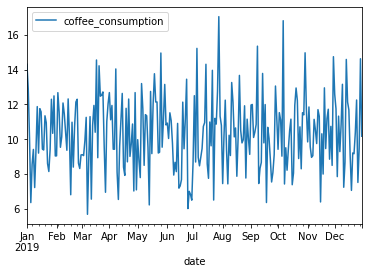

In [23]:
df.plot();


<p>This will work with the results of a resample as well:</p>


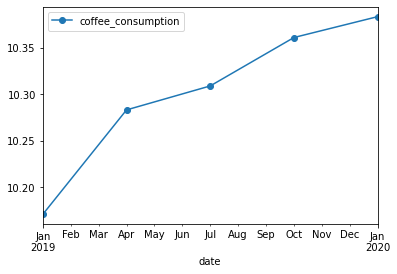

In [22]:
df.resample('3M').mean().plot(marker='o');

<h3 id="rolling-windows">Rolling Windows</h3>
<p>The <code>.rolling</code> method can be used to calculate rolling averages. A rolling
average lets us answer questions like: what was the average over the last 3
days? For every day in our dataset.</p>

,coffee_consumption,rolling_3,rolling_5,rolling_7
date,,,,
2019-01-06,10.902159,NaN,NaN,NaN
2019-01-13,9.277212,NaN,NaN,NaN
2019-01-20,10.265097,10.148156,NaN,NaN
2019-01-27,9.690260,9.744190,NaN,NaN
2019-02-03,10.639508,10.198289,10.154847,NaN
...,...,...,...,...
2019-04-21,9.881870,10.222518,10.732322,10.400220
2019-04-28,9.785978,9.846091,10.181278,10.520262
2019-05-05,9.256128,9.641326,9.941932,10.386246


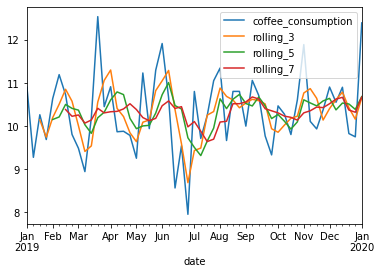

In [24]:
rolling_df = df.resample('W').mean().assign(
    rolling_3=lambda df: df.coffee_consumption.rolling(3).mean(),
    rolling_5=lambda df: df.coffee_consumption.rolling(5).mean(),
    rolling_7=lambda df: df.coffee_consumption.rolling(7).mean(),
)
rolling_df.plot()
rolling_df.head(20)

<p>We could also apply other aggregations with the .rolling method if we wanted:</p>


In [25]:
df.resample('W').mean().rolling(4).sum()


,coffee_consumption
date,
2019-01-06,NaN
2019-01-13,NaN
2019-01-20,NaN
2019-01-27,40.134728
2019-02-03,39.872077
...,...
2019-12-08,41.779107
2019-12-15,42.745896
2019-12-22,42.194309


<h3 id="lagging-and-lead">Lagging and Lead</h3>
<ul>
<li><code>.shift</code>: move the data backwards and forwards by a given amount</li>
<li><code>.diff</code>: find the difference with the previous observation (or a specified
  further back observation)</li>
</ul>

In [26]:
df['shift(-1)'] = df.coffee_consumption.shift(-1)
df['shift(1)'] = df.coffee_consumption.shift(1)
df['shift(3)'] = df.coffee_consumption.shift(3)
df['diff(1)'] = df.coffee_consumption.diff(1)
df['diff(3)'] = df.coffee_consumption.diff(3)
df.head(25)

,coffee_consumption,shift(-1),shift(1),shift(3),diff(1),diff(3)
date,,,,,,
2019-01-01,14.301915,12.905900,NaN,NaN,NaN,NaN
2019-01-02,12.905900,10.046015,14.301915,NaN,-1.396015,NaN
2019-01-03,10.046015,6.354805,12.905900,NaN,-2.859885,NaN
2019-01-04,6.354805,8.545563,10.046015,14.301915,-3.691210,-7.947110
2019-01-07,8.545563,9.410101,6.354805,12.905900,2.190757,-4.360337
...,...,...,...,...,...,...
2019-01-29,10.336273,12.488651,12.295298,8.141553,-1.959025,2.194720
2019-01-30,12.488651,9.035046,10.336273,9.421176,2.152378,3.067475
2019-01-31,9.035046,9.042273,12.488651,12.295298,-3.453605,-3.260252


In [27]:
# cleanup the additional columns
for col in ['shift(-1)', 'shift(1)', 'shift(3)', 'diff(1)', 'diff(3)']:
    del df[col]

In [28]:
df.head()

,coffee_consumption
date,
2019-01-01,14.301915
2019-01-02,12.905900
2019-01-03,10.046015
2019-01-04,6.354805
2019-01-07,8.545563


<h2 id="strftime">Strftime</h2>
<p>The <code>strftime</code> method can be used to format dates in a custom way using <strong>format specifiers</strong>.</p>


In [29]:
df.index.strftime('%B %d, %Y')[:4]


Index(['January 01, 2019', 'January 02, 2019', 'January 03, 2019',
       'January 04, 2019'],
      dtype='object', name='date')

<p>Here the <code>%B</code> means the full month name, <code>%d</code> means the 2-digit day and <code>%Y</code> means the 4-digit year.</p>
<p>See <a href="https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior">the python documentation</a> for a full listing of format specifiers.</p>


<h2 id="timezones">Timezones</h2>
<ul>
<li>To add a timezone to data that has none, use <code>tz_localize</code>. For central time: <code>tz_localize("America/Chicago")</code></li>
<li><code>.tz_localize(None)</code> will remove a timezone</li>
<li><code>.tz_convert</code> can be used to convert data from one timezone to another</li>
<li><code>df.index.tz is None</code> to check if a dataframe has a timezone set</li>
</ul>

<h2 id="timedeltas">Timedeltas</h2>
<p>We can use pandas to calculate how much time has elapsed between 2 data points. For example, let's calculate how many days it was between codeup's first data science cohort start date and graduation date.</p>


In [31]:
start_date = pd.to_datetime('20220111')
graduation_date = pd.to_datetime('20220314')

days_between = graduation_date - start_date
days_between

Timedelta('62 days 00:00:00')

<p>To convert this Timedelta object to a number:</p>


In [32]:
days_between // pd.Timedelta('1d')


62

<p>This will also work with multiple dates at once. For example, we can calculate how many days it was between the last date in a dataset and each data point like so:</p>


In [33]:
df['days_since_max'] = (df.index.max() - df.index) // pd.Timedelta('1d')
df.tail(10)

,coffee_consumption,days_since_max
date,,
2019-12-18,9.058819,13
2019-12-19,7.056316,12
2019-12-20,9.208448,11
2019-12-23,9.162464,8
2019-12-24,10.372400,7
2019-12-25,12.250875,6
2019-12-26,7.513206,5
2019-12-27,9.464345,4
2019-12-30,14.623106,1


<h2 id="further-reading">Further Reading</h2>
<ul>
<li><a href="http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects">Pandas date frequency strings</a></li>
<li><a href="https://zach.lol/strftime.html"><code>strftime</code> cheatsheet</a></li>
</ul>